In [46]:
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

bearer_token = "AAAAAAAAAAAAAAAAAAAAAEW93AEAAAAAlFxFNuEeKRg9kAdUnMZ1%2FTlQ0Xs%3DP4KFI8WBx3rRHirdCYD0tzWZglLPOFPsImZPPSpjJZrQoqSn3b"

client = tweepy.Client(bearer_token=bearer_token)

query = "bitcoin -is:retweet lang:en"  
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'text', 'author_id'])


tweet_data = [{
    'time': tweet.created_at,
    'author_id': tweet.author_id,
    'text': tweet.text
} for tweet in tweets.data]

df = pd.DataFrame(tweet_data)

print(df.head())

                       time            author_id  \
0 2025-07-22 08:42:44+00:00  1867565885340418048   
1 2025-07-22 08:42:44+00:00           1265301260   
2 2025-07-22 08:42:43+00:00  1352844463413080065   
3 2025-07-22 08:42:43+00:00           2819625181   
4 2025-07-22 08:42:42+00:00           3283596217   

                                                text  
0  @ChatKolz @dudu_bitcoin @Young3stOG I would lo...  
1  True BTCFi needs a programmable Bitcoin. Hemi ...  
2  @Le290788 @build_on_bob BOB is 🔥! Exciting to ...  
3  Hemi isn’t just scaling Bitcoin—it’s making it...  
4  @moralgrey I know it sounds too good to be tru...  


In [5]:
import re

def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)        # remove hashtag symbols
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove digits
    text = text.lower().strip()          # lowercase and trim
    return text

df['clean_text'] = df['text'].apply(clean_tweet)

print(df[['text', 'clean_text']].head())

                                                text  \
0  @Konahovsky63584 I’ll help you become a better...   
1  Want to earn points and help build bridgeless ...   
2            Bitcoin is undervalued Don't fade it. 🌐   
3  @spencer_7727 🚀Knows everything about the stoc...   
4  @spencer_7727 🚀Knows everything about the stoc...   

                                          clean_text  
0  ill help you become a better trader and achiev...  
1  want to earn points and help build bridgeless ...  
2                bitcoin is undervalued dont fade it  
3  knows everything about the stock market\ni mad...  
4  knows everything about the stock market\ni mad...  


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# the analyzer
analyzer = SentimentIntensityAnalyzer()

# sentiment scoring
df['sentiment'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify as Positive, Negative, or Neutral
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

print(df[['clean_text', 'sentiment', 'sentiment_label']].head())

                                          clean_text  sentiment  \
0  ill help you become a better trader and achiev...     0.9423   
1  want to earn points and help build bridgeless ...     0.6369   
2                bitcoin is undervalued dont fade it     0.0000   
3  knows everything about the stock market\ni mad...     0.0000   
4  knows everything about the stock market\ni mad...     0.0000   

  sentiment_label  
0        Positive  
1        Positive  
2         Neutral  
3         Neutral  
4         Neutral  


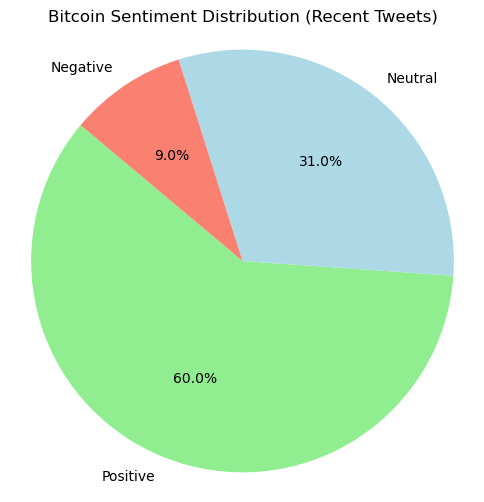

In [9]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_label'].value_counts()

# pie chart
colors = ['lightgreen', 'lightblue', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Bitcoin Sentiment Distribution (Recent Tweets)')
plt.axis('equal')
plt.show()

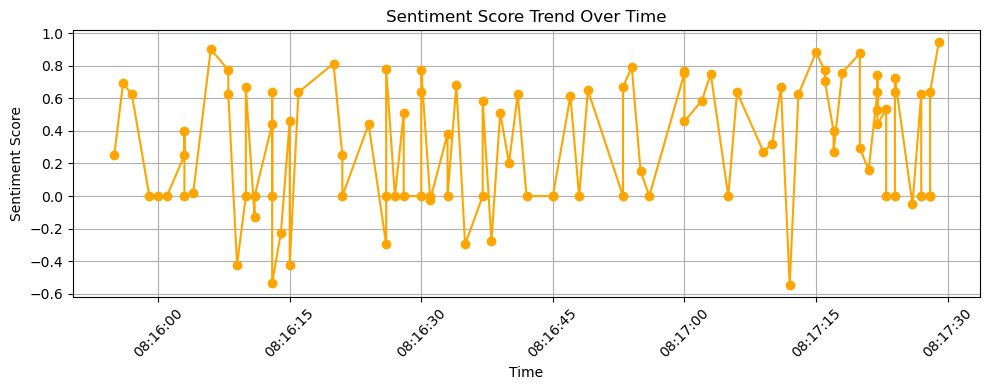

In [11]:
df['time'] = pd.to_datetime(df['time'])

df_sorted = df.sort_values(by='time')

plt.figure(figsize=(10, 4))
plt.plot(df_sorted['time'], df_sorted['sentiment'], marker='o', linestyle='-', color='orange')
plt.title('Sentiment Score Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

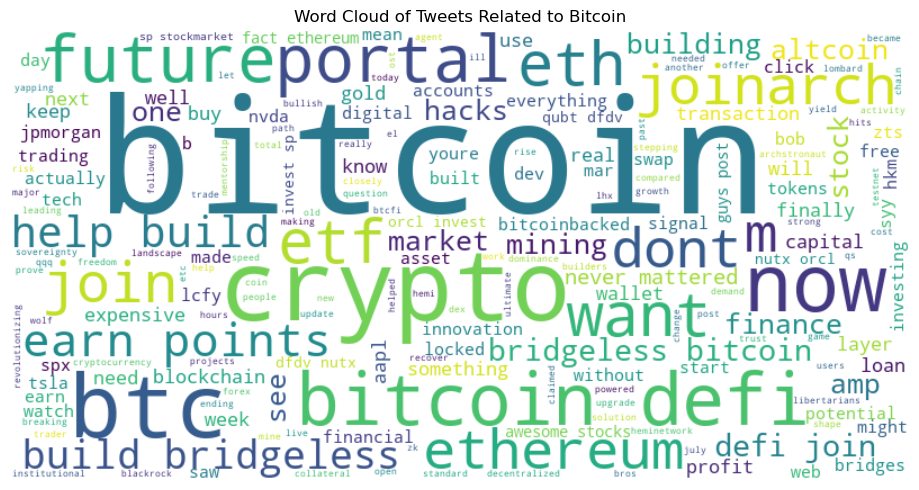

In [28]:
from wordcloud import WordCloud
top_positive = df.sort_values(by="sentiment", ascending=False).head(5)[['clean_text', 'sentiment']]
top_negative = df.sort_values(by="sentiment", ascending=True).head(5)[['clean_text', 'sentiment']]

text_all = " ".join(df['clean_text'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets Related to Bitcoin")
plt.tight_layout()
plt.show()

In [30]:
# Most Positive Tweets
top_positive = df.sort_values(by='sentiment', ascending=False).head(5)[['clean_text', 'sentiment']]
print("Top 5 Most Positive Tweets")
display(top_positive)

# Most Negative Tweets
top_negative = df.sort_values(by='sentiment').head(5)[['clean_text', 'sentiment']]
print("Top 5 Most Negative Tweets")
display(top_negative)

Top 5 Most Positive Tweets


,clean_text,sentiment
0,ill help you become a better trader and achiev...,0.9423
89,i got into crypto in just as bitcoin was star...,0.9001
25,morning vibes are strong is truly unlocking ...,0.8807
19,they built a path for bitcoin to finally plug ...,0.8750
73,bingx futures\nneiroctousdt all takeprofit tar...,0.8126


Top 5 Most Negative Tweets


,clean_text,sentiment
27,bitcoin summer hits like a freight train \nme...,-0.5423
78,well history proves them wrong humanity has al...,-0.5330
75,its not even up to hours i made it to the port...,-0.4215
86,this is the fix weve all been waiting for no m...,-0.4202
69,no need for expensive machines anymore bitcel...,-0.2960


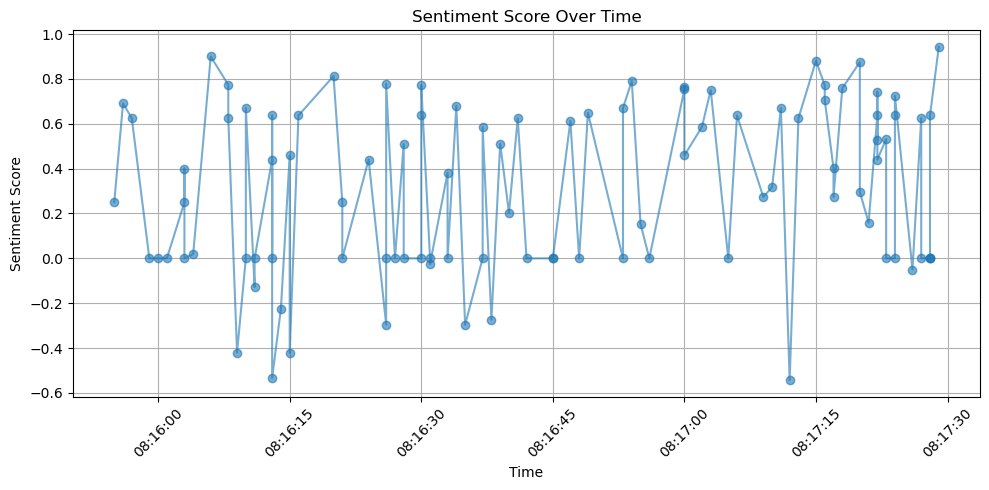

In [34]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['sentiment'], marker='o', linestyle='-', alpha=0.6)
plt.title('Sentiment Score Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
